<a href="https://colab.research.google.com/github/shriyapalkar/hands_on-data-science-projects/blob/main/linerreg_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

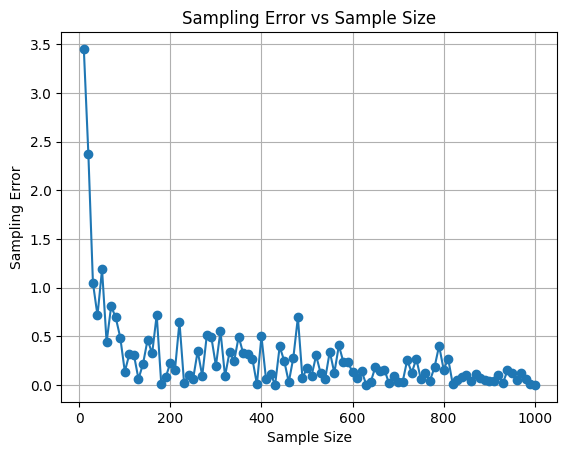

{'sample_mean': 49.598184426434216, 'population_mean': 50.05682048977721, 'population_std': 9.720513604736878, 'sample_std': 8.708362443747065, 'sampling_error': 0.45863606334299334, 'census': 50.05682048977721, 'sample_error': 0.45863606334299334}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_sample_statistics(data, sample_size):
  """
  Calculates sample statistics for a given data set and sample size.

  Args:
      data: The data set as a NumPy array.
      sample_size: The size of the sample to draw.

  Returns:
      A dictionary containing sample statistics:
          sample_mean: The mean of the sample.
          population_mean: The mean of the population (entire data set).
          population_std: The standard deviation of the population.
          sample_std: The standard deviation of the sample.
          sampling_error: The absolute difference between the population mean and sample mean.
          census: The population mean (same as population_mean).
          sample: This should return the sampling error, not the entire sample.
  """

  population_mean = np.mean(data)
  population_std = np.std(data)
  census = population_mean
  sample = np.random.choice(data, size=sample_size, replace=False)
  sample_mean = np.mean(sample)
  sample_std = np.std(sample, ddof=1)
  sampling_error = abs(population_mean - sample_mean)

  return {
      "sample_mean": sample_mean,
      "population_mean": population_mean,
      "population_std": population_std,
      "sample_std": sample_std,
      "sampling_error": sampling_error,
      "census": census,
      "sample_error": sampling_error  # Corrected to return sampling error
  }


def plot_sampling_error(data, sample_sizes):
  """
  Plots the sampling error vs sample size for a given data set.

  Args:
      data: The data set as a NumPy array.
      sample_sizes: A list of sample sizes to consider.
  """

  sampling_errors = []
  for size in sample_sizes:
    stats = calculate_sample_statistics(data, sample_size=size)
    sampling_errors.append(stats["sampling_error"])

  plt.plot(sample_sizes, sampling_errors, marker='o')
  plt.xlabel("Sample Size")
  plt.ylabel("Sampling Error")
  plt.title("Sampling Error vs Sample Size")
  plt.grid(True)
  plt.show()


# Generate data and sample sizes
data = np.random.normal(loc=50, scale=10, size=1000)
sample_sizes = range(10, 1001, 10)

# Plot sampling error
plot_sampling_error(data, sample_sizes)

# Calculate sample statistics for sample size 50
sample_stats = calculate_sample_statistics(data, sample_size=50)
print(sample_stats)

Mean Squared Error: 0.917753246971429
R-squared: 0.9576884341540605
Coefficients: [[1.99805182]]
Intercept: [1.20634019]


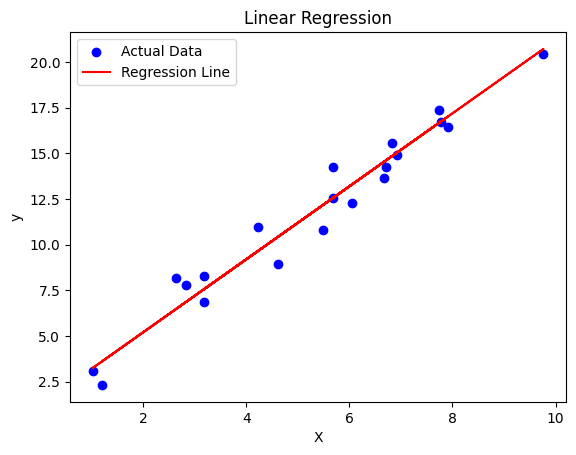

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
plt.scatter(X_test,y_test,color='blue',label='Actual Data')
plt.plot(X_test,y_pred,color='red',label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

Minimum: -0.9999954025133773


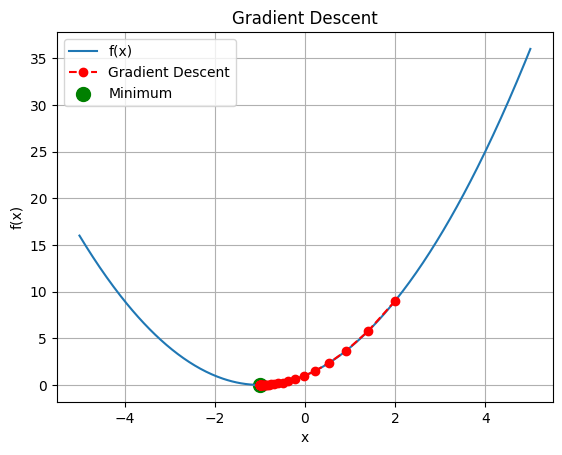

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-06):

    vector = start
    trajectory = [vector]
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
        trajectory.append(vector)
    return vector, trajectory


def func(x):
  return x**2 + 2*x + 1

def gradient(x):
  return 2*x + 2

start = 2.0
learn_rate = 0.1
n_iter = 100
tolerance = 1e-06

minimum, trajectory = gradient_descent(gradient, start, learn_rate, n_iter, tolerance)

print("Minimum:", minimum)

x_vals = np.linspace(-5, 5, 400)
y_vals = func(x_vals)

plt.plot(x_vals, y_vals, label='f(x)')

trajectory_x = [point for point in trajectory]
trajectory_y = [func(point) for point in trajectory]
plt.plot(trajectory_x, trajectory_y, marker='o', linestyle='--', color='r', label='Gradient Descent')
plt.scatter(trajectory_x[-1], trajectory_y[-1], color='g', s=100, label='Minimum')


plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()